# Assignment for obfuscated-text-prediction

# 1- Import Key Modules

In [2]:
# support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# for data processing

import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import numpy as np 
import pandas as pd 
import random
from collections import Counter
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

#For Visuals

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# for ML

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import ensemble, metrics, model_selection, naive_bayes

#For deep learning i.e keras related

from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping

#more deep learning i.e pytorch

import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

In [4]:
# testing GPU on colab
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [5]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10222326485165897964, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 963369537535562461
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3035115123101682427
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14640891840
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14060447116873822058
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

# 2- Loading & Preparing Data

In [6]:
data_xtrain=pd.read_csv('xtrain_obfuscated.txt', header = None,sep=" " )
data_xtrain.columns = ["text"]
data_xtrain.shape

(32513, 1)

In [7]:
data_xtest=pd.read_csv('xtest_obfuscated.txt', header = None,sep=" " )
data_xtest.columns = ["text"]
data_xtest.shape

(3000, 1)

In [8]:
data_ytrain=pd.read_csv('ytrain.txt', header = None,sep=" " )
data_ytrain.columns = ["label"]
data_ytrain.shape

(32513, 1)

In [9]:
data_ytrain.label.value_counts()

7     5097
6     4226
3     4023
8     3634
1     3459
10    3052
4     2337
5     2283
2     1471
11    1408
9      980
0      543
Name: label, dtype: int64

In [10]:
data_ytrain.label.value_counts(normalize=True)

7     0.156768
6     0.129979
3     0.123735
8     0.111771
1     0.106388
10    0.093870
4     0.071879
5     0.070218
2     0.045243
11    0.043306
9     0.030142
0     0.016701
Name: label, dtype: float64

### 2.1.Creating train-test for ML model experiment

75%-25% split

In [11]:
train_data_x = lines[:24384]
test_data_x = lines[24384:]

train_data_y = lines[:24384]
test_data_y = lines[24384:]

### 2.2.TF-IDF 

In [13]:
print(len(train_data_x))
print(len(test_data_x))
print(len(train_data_y))
print(len(test_data_y))

# vectorizer
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='char',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1)

# Fitting TF-IDF to training and only transforming to our given test sets
xtrain_tfv =  tfv.fit_transform(train_data_x) 
xvalid_tfv = tfv.transform(test_data_x)

24384
8129
24384
8129


### 2.3.Tokenize

in terms of characters

In [14]:
def tokenize_chars(s):
        return list(s)
print(tokenize_chars(train_data_x[3]))

['r', 'a', 's', 'k', 'l', 'e', 'e', 'n', 'k', 'r', 'l', 'r', 'u', 'h', 't', 'w', 'u', 'l', 'e', 'n', 'l', 'e', 'e', 'n', 'g', 'z', 't', 'w', 'q', 'v', 'u', 'h', 'e', 'n', 'u', 'h', 's', 'a', 't', 'v', 'u', 'h', 's', 'k', 't', 'w', 's', 'k', 'v', 'i', 'k', 'r', 'p', 'm', 'l', 'e', 'l', 'e', 'k', 'r', 'q', 'v', 'u', 'h', 's', 'k', 't', 'w', 'u', 'c', 'i', 'w', 'e', 'n', 'd', 'f', 'u', 'h', 'a', 'm', 'y', 'p', 'e', 'n', 't', 'w', 'u', 'h', 's', 'k', 'v', 'i', 'e', 'n', 'u', 'h', 'q', 'g', 'u', 'l', 'l', 'e', 'e', 'n', 'g', 'z', 'e', 'n', 'u', 'h', 'u', 'l', 'g', 'z', 't', 'w', 'u', 'c', 'u', 'h', 't', 'w', 'l', 'e', 't', 'w', 'd', 'f', 'u', 'h', 'p', 'm', 'd', 'f', 'u', 'l', 'u', 'h', 't', 'w', 'a', 'm', 'g', 'u', 'u', 'h', 'r', 'a', 'l', 'r', 'v', 'i', 'm', 'v', 'e', 'z', 'p', 'm', 'y', 'p', 'u', 'h', 't', 'w', 'l', 'e', 'e', 'n', 'u', 'h', 'k', 'r', 'p', 'm', 's', 'a', 'u', 'h', 'd', 'f', 'p', 'm', 'v', 'i', 'u', 'c', 'u', 'h', 's', 'a', 't', 'w', 'a', 'm', 'u', 'l', 'n', 'k', 'u', 'h',

# 3-ML Models

### 3.1.Logistic Classifier

In [15]:
# Fitting a simple Logistic Regression on TFIDF
from sklearn.linear_model import LogisticRegression

def multiclass_logloss(actual, predicted, eps=1e-15):
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota


clf = LogisticRegression(C=1.0)
clf.fit(xtrain_tfv, train_data_y)
predictions = clf.predict_proba(xvalid_tfv)

print(type(predictions))
print(predictions.shape[0])


<class 'numpy.ndarray'>
8129


In [16]:
import math
print(type(predictions))
print(predictions.shape[0])
print (predictions.shape[1])
print (predictions[:4])
print("logloss: %0.3f " % metrics.log_loss(test_data_y, predictions))
print(str(math.exp(-(metrics.log_loss(test_data_y, predictions)))) + "% is the accuracy")

<class 'numpy.ndarray'>
8129
12
[[3.14556436e-03 1.69055379e-01 1.89131777e-01 2.57902969e-02
  3.20341153e-02 9.50824123e-02 1.66894664e-01 6.22458334e-04
  6.30384208e-02 1.43139316e-01 9.19766347e-02 2.00889615e-02]
 [5.53550585e-03 7.89262130e-03 7.07279749e-01 2.47082858e-03
  5.89613244e-03 1.67387807e-01 2.66963062e-02 6.69874690e-03
  1.28201529e-02 1.59514401e-02 2.55040359e-02 1.58666740e-02]
 [1.29849972e-02 6.15375508e-03 4.40324376e-01 1.30290707e-02
  1.20669248e-01 1.01290934e-01 6.11692947e-02 7.11964679e-02
  5.19199095e-03 1.40064788e-01 5.73837500e-03 2.21867023e-02]
 [2.38199138e-02 2.82644449e-02 4.26777587e-02 1.42232634e-01
  5.44014792e-02 2.30659583e-02 3.33314847e-02 1.34820956e-02
  3.38149695e-01 1.14791795e-01 5.56456243e-02 1.30137116e-01]]
logloss: 0.915 
0.40054407349819154% is the accuracy


#### Count Vectorizer with Logistic Clf

In [17]:
ctv = CountVectorizer(analyzer='char',ngram_range=(1, 3))

# Fitting Count Vectorizer to both training and test sets (semi-supervised learning)
ctv.fit(train_data_x + test_data_x)
xtrain_ctv =  ctv.transform(train_data_x) 
xvalid_ctv = ctv.transform(test_data_x)

# Fitting a simple Logistic Regression on Counts
clf = LogisticRegression(C=1.0)
clf.fit(xtrain_ctv, train_data_y)
predictions = clf.predict_proba(xvalid_ctv)

print ("logloss: %0.3f " % metrics.log_loss(np.asarray(test_data_y), predictions))
print(str(math.exp(-(metrics.log_loss(test_data_y, predictions)))) + "% is the accuracy")
print(test_data_y[:15])
print(predictions[:15])

logloss: 1.105 
0.33134391352951087% is the accuracy
['10', '10', '10', '6', '4', '8', '3', '6', '4', '8', '3', '3', '1', '11', '3']
[[1.95196783e-05 2.52102828e-01 2.26780181e-01 1.18420910e-02
  6.78373810e-03 1.26334046e-01 1.96616241e-01 3.02823109e-06
  4.72879084e-02 4.75532165e-02 7.50952923e-02 9.58190931e-03]
 [5.87799933e-04 1.12555032e-03 4.50892838e-01 9.73586616e-05
  2.51275060e-05 5.15589037e-01 8.66491918e-03 2.07565880e-05
  2.50301664e-03 1.31825189e-03 1.37961614e-02 5.37918260e-03]
 [3.23719303e-03 8.23895452e-03 1.62175421e-01 1.44442949e-02
  1.69664200e-01 1.74574407e-01 2.35215887e-02 2.21876398e-01
  1.19797827e-03 2.06354922e-01 3.91886994e-03 1.07957726e-02]
 [2.40128374e-02 1.55505473e-03 2.59438649e-02 2.11824520e-02
  3.30547328e-02 8.33999672e-03 3.50132044e-02 1.94036175e-04
  7.03406227e-01 5.62596014e-02 1.07607692e-02 8.02772229e-02]
 [3.79662984e-01 1.50538801e-07 8.71786810e-04 3.22436221e-05
  2.82266659e-03 6.64120738e-04 5.97015467e-01 1.59843875

### 3.2.NAive Bayes Classifier

- both with tfidf and count vector

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.svm import SVC
import math
# Fitting a simple Naive Bayes on TFIDF
clf = MultinomialNB()
clf.fit(xtrain_tfv, train_data_y)
predictions = clf.predict_proba(xvalid_tfv)
print ("logloss: %0.3f " % metrics.log_loss(np.asarray(test_data_y), predictions))
print(str(math.exp(-(metrics.log_loss(test_data_y, predictions)))) + "% is the accuracy  with tf-idf")
# Fitting a simple Naive Bayes on Counts
clf = MultinomialNB()
clf.fit(xtrain_ctv, train_data_y)
predictions = clf.predict_proba(xvalid_ctv)
print("logloss: %0.3f " % metrics.log_loss(np.asarray(test_data_y), predictions))
print(str(math.exp(-(metrics.log_loss(test_data_y, predictions)))) + "% is the accuracy with count vector")

logloss: 1.480 
0.22766292598326332% is the accuracy  with tf-idf
logloss: 4.991 
0.006800210394896666% is the accuracy with count vector


**As we can find that accuracy is not good. There an option to use SVD decomposition and compare models' performance if it gets any better**

### Using SVD

To reduce dimensions

In [19]:
# Apply SVD, I chose 120 components. 120-200 components are good enough.
from sklearn.decomposition import TruncatedSVD
svd = decomposition.TruncatedSVD(n_components=120)
svd.fit(xtrain_tfv)
xtrain_svd = svd.transform(xtrain_tfv)
xvalid_svd = svd.transform(xvalid_tfv)
# Scale the data obtained from SVD. Renaming variable to reuse without scaling.
scl = preprocessing.StandardScaler()
scl.fit(xtrain_svd)
xtrain_svd_scl = scl.transform(xtrain_svd)
xvalid_svd_scl = scl.transform(xvalid_svd)

### 3.3.SVC Model

In [20]:
# Fitting a simple SVM
clf = SVC(C=1.0, probability=True) # since we need probabilities
clf.fit(xtrain_svd_scl, train_data_y)
predictions = clf.predict_proba(xvalid_svd_scl)
print("logloss: %0.3f " % metrics.log_loss(np.asarray(test_data_y), predictions))
print(str(math.exp(-(metrics.log_loss(test_data_y, predictions)))) + "% is the accuracy")

logloss: 1.098 
0.3335737608463796% is the accuracy


### 3.4.XGBoost

#### 3.4.a Fitting a simple xgboost on tf-idf

In [21]:
import xgboost as xgb
clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
clf.fit(xtrain_tfv.tocsc(), train_data_y)
predictions = clf.predict_proba(xvalid_tfv.tocsc())
print("logloss: %0.3f " % metrics.log_loss(np.asarray(test_data_y), predictions))
print(str(math.exp(-(metrics.log_loss(test_data_y, predictions)))) + "% is the accuracy")

logloss: 0.775 
0.46084783983341926% is the accuracy


#### 3.4.b. Fitting a simple xgboost on tf-idf svd features

In [22]:
clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
clf.fit(xtrain_svd, train_data_y)
predictions = clf.predict_proba(xvalid_svd)
print("logloss: %0.3f " % metrics.log_loss(np.asarray(test_data_y), predictions))
print(str(math.exp(-(metrics.log_loss(test_data_y, predictions)))) + "% is the accuracy")


logloss: 1.247 
0.28745401496850476% is the accuracy


#### 3.4.c.Fitting a simple xgboost on tf-idf countvectorizer features

In [23]:
clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
clf.fit(xtrain_ctv.tocsc(), train_data_y)
predictions = clf.predict_proba(xvalid_ctv.tocsc())
print("logloss: %0.3f " % metrics.log_loss(np.asarray(test_data_y), predictions))
print(str(math.exp(-(metrics.log_loss(test_data_y, predictions)))) + "% is the accuracy")

logloss: 0.736 
0.4787947429027305% is the accuracy


# 4- Other Vectorization methods

### 4.a. Steps to get Glove embedding

In [24]:
#1-Download the zip file
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-09-06 07:23:09--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-09-06 07:23:09--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-09-06 07:23:10--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [25]:
# 2-Unzip it
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [26]:
#3-Get the exact path of where the embedding vectors are extracted 

!ls
!pwd

glove.6B.100d.txt  glove.6B.50d.txt  xtest_obfuscated.txt
glove.6B.200d.txt  glove.6B.zip      xtrain_obfuscated.txt
glove.6B.300d.txt  sample_data	     ytrain.txt
/content


In [ ]:
# 4-Index the vectors
print('Indexing word vectors.')

embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

In [ ]:
#5- Fuse with google - drive
!pip install --upgrade pip
!pip install -U -q pydrive
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null

!apt-get -y install -qq google-drive-ocamlfuse fuse

In [ ]:
from google.colab import auth
auth.authenticate_user()
# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

!mkdir -p drive
!google-drive-ocamlfuse drive

In [ ]:
#6-Save the indexed vectors to google drive for re-use

import pickle
pickle.dump({'embeddings_index' : embeddings_index } , open('/drive', 'wb'))

In [ ]:
from google.colab import files
files.upload()

In [28]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
# nltk.download()
# stop_words = stopwords.words('english')
from tensorflow.python.client import device_lib

def get_available_devices():  
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

# Word Vectors
# load the GloVe vectors in a dictionary:
from tqdm import tqdm
embeddings_index = {}
f = open('glove.6B.300d.txt')
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))



2441it [00:00, 12274.93it/s]

['/device:CPU:0', '/device:XLA_CPU:0', '/device:XLA_GPU:0', '/device:GPU:0']


400000it [00:30, 13025.13it/s]

Found 400000 word vectors.


### 4b. Preparaing training-test features w.r.t. Glove embedding

In [31]:
# this function creates a normalized vector for the whole sentence
from nltk import word_tokenize
def sent2vec(s):
    words = str(s).lower()
    words = tokenize_chars(words)
#     words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(450)
    return v / np.sqrt((v ** 2).sum())

# create sentence vectors using the above function for training and validation set
xtrain_glove = [sent2vec(x) for x in tqdm(train_data_x)]
xvalid_glove = [sent2vec(x) for x in tqdm(test_data_x)]

xtrain_glove = np.array(xtrain_glove)
xvalid_glove = np.array(xvalid_glove)


100%|██████████| 24384/24384 [00:08<00:00, 2904.55it/s]

100%|██████████| 8129/8129 [00:02<00:00, 3028.79it/s]


# 5-Applying a xgboost using glove features

In [33]:
clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1, silent=False)
clf.fit(xtrain_glove, train_data_y)
predictions = clf.predict_proba(xvalid_glove)
print("logloss: %0.3f " % metrics.log_loss(np.asarray(test_data_y), predictions))
print(str(math.exp(-(metrics.log_loss(test_data_y, predictions)))) + "% is the accuracy")

logloss: 1.938 
0.14405853315059244% is the accuracy


# 6- Deep Learning

Key assumption here is that this text data even though obfuscated is in sequence. That's why RNN (LSTMS, GRU) are the chocice.

In [34]:
# scale the data before any neural net:
scl = preprocessing.StandardScaler()
xtrain_glove_scl = scl.fit_transform(xtrain_glove)
xvalid_glove_scl = scl.transform(xvalid_glove)

In [35]:
# binarize the labels for the neural net
ytrain_enc = np_utils.to_categorical((train_data_y))
yvalid_enc = np_utils.to_categorical((test_data_y))

**Sequential Neural Net**

In [38]:
# create a simple 3 layer sequential neural net
model = Sequential()

model.add(Dense(300, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(300, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(12))
model.add(Activation('softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 300)               1200      
_________________________________________________________________
dense_4 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout_3 (Dropout)          (None, 300)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 300)               1200      
_________________________________________________________________
dense_5 (Dense)              (None, 12)               

In [39]:
from keras.callbacks import EarlyStopping
history=model.fit(xtrain_glove_scl, y=ytrain_enc, batch_size=64, 
          epochs=50, verbose=1, 
          validation_data=(xvalid_glove_scl, yvalid_enc),
          callbacks=[EarlyStopping(monitor='val_loss', patience=3,min_delta=0.0001)])

Epoch 1/50
381/381 [==============================] - 2s 4ms/step - loss: 2.2540 - accuracy: 0.2731 - val_loss: 1.9213 - val_accuracy: 0.3368
Epoch 2/50
381/381 [==============================] - 1s 4ms/step - loss: 1.9560 - accuracy: 0.3322 - val_loss: 1.8482 - val_accuracy: 0.3602
Epoch 3/50
381/381 [==============================] - 1s 4ms/step - loss: 1.8687 - accuracy: 0.3559 - val_loss: 1.8124 - val_accuracy: 0.3732
Epoch 4/50
381/381 [==============================] - 1s 4ms/step - loss: 1.8214 - accuracy: 0.3685 - val_loss: 1.7943 - val_accuracy: 0.3736
Epoch 5/50
381/381 [==============================] - 1s 4ms/step - loss: 1.8041 - accuracy: 0.3723 - val_loss: 1.7774 - val_accuracy: 0.3777
Epoch 6/50
381/381 [==============================] - 1s 4ms/step - loss: 1.7791 - accuracy: 0.3826 - val_loss: 1.7656 - val_accuracy: 0.3858
Epoch 7/50
381/381 [==============================] - 1s 3ms/step - loss: 1.7706 - accuracy: 0.3838 - val_loss: 1.7559 - val_accuracy: 0.3825
Epoch 

**We may get better accuracy with more epochs but, We can find an overfitting trend.**

In [40]:
loss, accuracy = model.evaluate(xtrain_glove_scl, ytrain_enc, verbose=False)
print("Training Loss: {:.4f}".format(loss))

Training Loss: 1.4999


In [41]:
loss, accuracy = model.evaluate(xvalid_glove_scl, yvalid_enc, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Testing Accuracy:  0.4036
Testing Loss:  1.7170


In [42]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

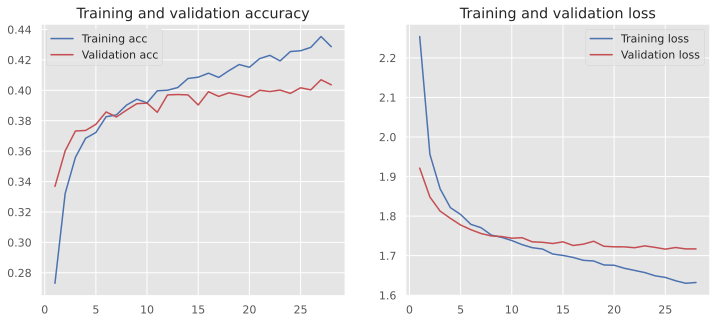

In [43]:
plot_history(history)

We can notice overfitting as training data gets better accuracy and lower loss compared to validation data.

In [44]:
print(xtrain_glove_scl.shape)
print(len(xtrain_glove[45]))

(24384, 300)
300


### 6.1.LSTM

In [45]:
# using keras tokenizer here
token = text.Tokenizer(num_words=None, char_level=True)
max_len = 450

token.fit_on_texts(list(train_data_x) + list(test_data_x))
xtrain_seq = token.texts_to_sequences(train_data_x)
xvalid_seq = token.texts_to_sequences(test_data_x)

In [46]:
# zero pad the sequences
xtrain_pad = sequence.pad_sequences(xtrain_seq, maxlen=max_len)
xvalid_pad = sequence.pad_sequences(xvalid_seq, maxlen=max_len)

word_index = token.word_index

In [47]:
print(len(xtrain_seq))
print(len(xvalid_seq))

print(len(xvalid_pad[0]))

print(xtrain_pad[0])
print(word_index)

24384
8129
450
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 15 11  8  7
 11  3  1  6  1  2 13 17  1  6 11  3  6 16  3  4  5 18  1  2 13  4 12 16
 10  3  6  5  8  7  1  6 23  9  8  7 15 12  1  2  6  5  3  4  8  7 11  3
  1  6  1  2  9  7  9  7  5 14  1  2  6 16  4  9  3  4 13  4 12 16  1  2
  1  6  5 14 11  3  1  6  1  2 13 17 13  4  8  7  4  9  3  4  9  7  1  2
  8  7 11  3  1  6  1  2  1  6 13  4 12 16  5 14 11  3 23  9  8  7  1  2
  4  9 10  3 10  3 13  4  1  2 15 12  9  7 12 16 10  3 19 20  1  2  6 16
  4  9  3  4 15 12  4  9 12 16 10  3 13  4  1  2 15 12  3  4 17 18  5 14
  6  5  1  2 13  4  3  4 11  3  1  6  1  2  1  6  5 14 11  3  1  6  1  2
 13  4  6  5  8  7  8  7  4  9 10  3 10  3 17 18  6  5  5 14 11  3  1  2
  8  7 11  3  1  6  1  2  8  7  6  5  8  7 19 20  1  2  9  7 12 16 22  5
  6  5  5 14  8  7 22  5  1  2 10  3 13  4  1  2  8  7  9  7  3  4 11  3
 19 20  1  2 10 12  5 18  8  7 11  3

In [48]:
# create an embedding matrix for the words we have in the dataset
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# we need to binarize the labels for the neural net
ytrain_enc = np_utils.to_categorical((train_data_y))
yvalid_enc = np_utils.to_categorical((test_data_y))        

# A simple LSTM with glove embeddings and two dense layers
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(12))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


100%|██████████| 26/26 [00:00<00:00, 51707.87it/s]

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 450, 300)          8100      
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 450, 300)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               160400    
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              103424    
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)             

In [49]:
# Fit the model with early stopping callback
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

In [51]:
history=model.fit(xtrain_pad, y=ytrain_enc, batch_size=512, epochs=100, 
          verbose=1, validation_data=(xvalid_pad, yvalid_enc))

Epoch 1/100
48/48 [==============================] - 76s 2s/step - loss: 2.3294 - accuracy: 0.1633 - val_loss: 2.3045 - val_accuracy: 0.1787
Epoch 2/100
48/48 [==============================] - 74s 2s/step - loss: 2.2870 - accuracy: 0.1784 - val_loss: 2.2721 - val_accuracy: 0.1933
Epoch 3/100
48/48 [==============================] - 73s 2s/step - loss: 2.2626 - accuracy: 0.1931 - val_loss: 2.2483 - val_accuracy: 0.2004
Epoch 4/100
48/48 [==============================] - 73s 2s/step - loss: 2.2401 - accuracy: 0.1978 - val_loss: 2.2198 - val_accuracy: 0.1982
Epoch 5/100
48/48 [==============================] - 72s 2s/step - loss: 2.2207 - accuracy: 0.2034 - val_loss: 2.2114 - val_accuracy: 0.2046
Epoch 6/100
48/48 [==============================] - 72s 1s/step - loss: 2.2120 - accuracy: 0.2027 - val_loss: 2.2097 - val_accuracy: 0.2027
Epoch 7/100
48/48 [==============================] - 71s 1s/step - loss: 2.2096 - accuracy: 0.2039 - val_loss: 2.2054 - val_accuracy: 0.2030
Epoch 8/100
4

**I am writing this comment after working with other models already. This model performs the best. It has good accuracy and it could improve by running on more iterations. Also, it does not over or under fit. That is why it is considered most suitable model. Our test data results are predicted on this model.**

In [52]:
loss, accuracy = model.evaluate(xtrain_pad, ytrain_enc, verbose=False)
print("Training Loss: {:.4f}".format(loss))

Training Loss: 1.1941


In [53]:
loss, accuracy = model.evaluate(xvalid_pad, yvalid_enc, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Testing Accuracy:  0.5519
Testing Loss:  1.2884


In [54]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

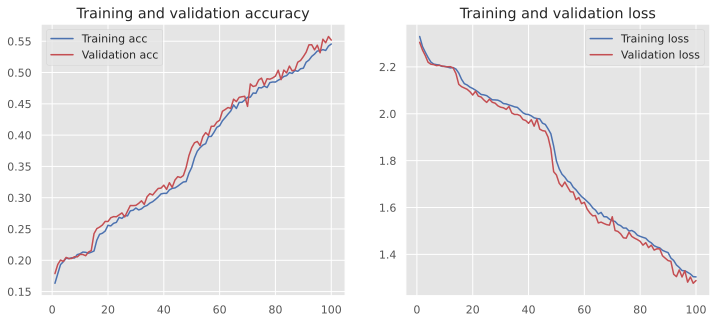

In [55]:
plot_history(history)

In [56]:
y_pred = model.predict(xvalid_pad)
y_pred[:5]

array([[2.56342720e-03, 2.06219122e-01, 1.17099427e-01, 1.81341797e-01,
        4.28783847e-03, 6.46240311e-03, 9.39968973e-02, 6.71498850e-02,
        1.09254150e-02, 5.82434759e-02, 1.47631809e-01, 1.04078576e-01],
       [4.46015112e-02, 4.06687781e-02, 8.87306482e-02, 3.82612795e-01,
        2.83242911e-02, 4.96612005e-02, 6.20838674e-03, 5.67524023e-02,
        9.89402272e-03, 8.53671432e-02, 1.61636844e-01, 4.55419384e-02],
       [3.29575017e-02, 5.51940240e-02, 1.13718741e-01, 3.40717554e-01,
        1.75099149e-02, 3.47286537e-02, 1.02103660e-02, 3.40542793e-02,
        7.68176233e-03, 1.38458714e-01, 1.36889383e-01, 7.78790936e-02],
       [3.15767713e-04, 4.37566526e-02, 1.13535695e-01, 2.83572320e-02,
        6.12713443e-03, 1.20356570e-04, 3.81116599e-01, 1.28017500e-01,
        2.19254587e-02, 5.08681983e-02, 1.79810882e-01, 4.60485518e-02],
       [2.68656033e-04, 2.76686478e-08, 2.75223392e-05, 3.81810605e-06,
        6.10895872e-01, 1.55530468e-01, 9.33366100e-05, 1.38

In [57]:
print(y_pred.shape)

(8129, 12)


In [58]:
## predict crisp classes for test set. Output will be 1-D
y_val_class = np.argmax(yvalid_enc,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [59]:
y_pred_class[:5]

array([1, 3, 3, 6, 4])

In [60]:
y_pred_class.shape

(8129,)

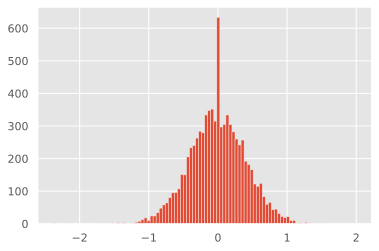

In [61]:
plt.hist(model.get_weights()[0].ravel(),100)
plt.show()

We can a symmetry in distribution

In [62]:
model.weights

[<tf.Variable 'embedding/embeddings:0' shape=(27, 300) dtype=float32, numpy=
 array([[ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
          0.       ],
        [ 0.016393 , -0.40067  , -0.26541  , ..., -0.63718  , -0.066708 ,
          0.35212  ],
        [-0.079137 ,  0.1949   , -0.27255  , ..., -0.56635  ,  0.40171  ,
          0.070537 ],
        ...,
        [-0.0018332, -0.3367   , -0.13084  , ..., -0.99107  , -0.46648  ,
          0.1936   ],
        [ 0.1593   ,  0.30671  ,  0.093787 , ..., -0.76431  , -0.12928  ,
          0.29616  ],
        [ 0.048902 ,  0.29453  , -0.06686  , ..., -1.4618   , -0.3512   ,
         -0.098858 ]], dtype=float32)>,
 <tf.Variable 'lstm/lstm_cell/kernel:0' shape=(300, 400) dtype=float32, numpy=
 array([[ 1.7764857e-01, -1.7596553e-01,  8.4426031e-02, ...,
         -4.2946592e-02,  1.2763399e-01,  4.2361718e-02],
        [-7.2352111e-02, -5.3693131e-02, -5.8576528e-02, ...,
         -8.3887004e-05,  1.8999100e-01, -2.1589603e-02

**Working on test data given for prediction**

In [91]:
from keras.preprocessing.text import Tokenizer
X=data_xtest.text

In [93]:
tokenizer = Tokenizer(num_words=None,char_level=True)
tokenizer.fit_on_texts(X.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
# convert to sequence
X_token = tokenizer.texts_to_sequences(X.values)

Found 26 unique tokens.


In [95]:
pd.DataFrame(X_token).shape

(3000, 448)

In [96]:
pd.DataFrame(X_token).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447
0,8,4,6,5,8,7,17,18,12,16,13,4,1,2,8,7,11,3,1,6,1,2,10,12,15,12,10,3,10,3,9,7,8,4,1,2,11,3,13,4,...,3.0,4.0,1.0,2.0,10.0,3.0,10.0,3.0,9.0,7.0,6.0,5.0,8.0,7.0,1.0,6.0,5.0,14.0,24.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13,4,3,4,1,2,15,12,6,5,5,14,3,4,4,9,5,14,17,18,22,21,1,2,13,4,3,4,11,3,17,1,1,2,16,11,12,16,10,3,...,8.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,7,11,3,1,2,1,6,5,14,11,3,1,6,1,2,15,12,4,9,5,14,1,2,13,17,19,20,8,7,3,4,3,12,6,5,8,7,1,6,...,5.0,5.0,1.0,2.0,16.0,11.0,6.0,5.0,13.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15,24,24,11,8,7,13,4,4,9,8,7,13,4,4,9,10,3,4,9,1,2,24,11,11,3,10,3,10,3,3,7,1,2,1,2,16,11,1,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,5,10,3,1,2,10,3,19,20,1,6,1,2,8,7,6,5,8,7,19,20,1,2,8,7,6,5,8,7,11,3,17,1,1,2,1,2,16,11,...,5.0,18.0,10.0,3.0,6.0,5.0,22.0,5.0,1.0,2.0,6.0,5.0,8.0,7.0,11.0,3.0,1.0,6.0,8.0,7.0,6.0,16.0,10.0,3.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
#pad the sequence
from keras.preprocessing.sequence import pad_sequences
max_len = 450
X_pd_sq = pad_sequences(X_token,maxlen=max_len)

In [103]:
print(X_pd_sq.shape)

(3000, 450)


In [104]:
pd.DataFrame(X_pd_sq).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,4,6,5,8,7,17,18,12,16,13,4,1,2,8,7,11,3,...,8,7,9,7,1,6,1,6,5,14,8,4,1,2,5,14,1,2,13,4,3,4,1,2,10,3,10,3,9,7,6,5,8,7,1,6,5,14,24,12
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8,7,15,11,8,7,1,2,13,4,4,9,5,14,5,18,1,2,15,12,9,7,10,3,1,2,8,7,11,3,1,6,1,2,1,6,12,16,8,4
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,7,11,3,1,2,1,6,...,19,20,10,3,1,6,13,4,8,7,8,4,1,2,13,17,6,16,4,9,3,4,9,7,1,6,3,4,11,3,5,5,1,2,16,11,6,5,13,25
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5,14,11,3,1,2,10,12,13,4,8,7,5,18,3,4,1,6,8,7,5,18,10,3,13,4,1,2,13,4,6,5,8,7,3,12,8,7,22,5
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,5,10,3,1,2,10,3,19,20,1,6,1,2,8,7,6,5,8,7,19,20,1,2,...,17,18,12,16,1,2,8,7,11,3,1,6,1,2,5,18,10,3,6,5,22,5,1,2,6,5,8,7,11,3,1,6,8,7,6,16,10,3,1,6


In [105]:
y_pred_result = model.predict(X_pd_sq)
y_pred_result[:5]

array([[2.45344324e-07, 2.13680770e-02, 1.13887936e-02, 1.41964387e-03,
        4.11576875e-05, 3.93448033e-07, 6.23770654e-01, 2.90529072e-01,
        9.36553627e-03, 1.96884223e-03, 3.09233908e-02, 9.22417548e-03],
       [2.54108272e-05, 4.37561631e-01, 7.66604915e-02, 2.17635542e-01,
        1.48748659e-05, 1.21128419e-03, 1.11760767e-02, 2.66560842e-03,
        1.73746899e-04, 1.22737987e-02, 2.36130077e-02, 2.16988534e-01],
       [6.93114102e-03, 1.11471256e-02, 1.61159821e-02, 1.22415856e-01,
        1.30029336e-01, 2.73484224e-03, 2.86217290e-03, 6.05605822e-03,
        1.39944896e-01, 1.82209536e-02, 5.38636208e-01, 4.90541430e-03],
       [1.29646649e-11, 1.58691194e-09, 6.93726465e-11, 4.42146401e-13,
        3.53306619e-04, 9.71117515e-07, 2.93362624e-04, 4.93032770e-09,
        9.99352396e-01, 5.88597964e-13, 6.98429425e-10, 2.53396089e-11],
       [2.64655566e-04, 3.31024061e-08, 2.24833530e-05, 3.33746061e-06,
        6.11268878e-01, 1.16908900e-01, 9.55068390e-05, 1.57

In [108]:
prediction_df=pd.DataFrame(y_pred_result)

In [110]:
pred_value_class=prediction_df.max(axis=1)
pred_value_class[:5]

0    0.623771
1    0.437562
2    0.538636
3    0.999352
4    0.611269
dtype: float32

In [106]:
## predict crisp classes for test set. Output will be 1-D
y_pred_class = np.argmax(y_pred_result,axis=1)
y_pred_class[:5]

array([ 6,  1, 10,  8,  4])

In [111]:
df_submit=data_xtest.copy()
df_submit["predicted_class"]=y_pred_class
df_submit["probability"]=pred_value_class
df_submit.head()

,text,predicted_class,probability
0,tvletwgzkrqvuhtwamuluhpkskpmpmiwtvuhamqvmviwlr...,6,0.623771
1,qvmvuhskleenmvviengzxyuhqvmvamguuhrakrpmsauhul...,1,0.437562
2,twamuhulenamuluhskvienuhqgdftwmvmkletwulvimvuh...,10,0.538636
3,sooatwqvvitwqvvipmviuhoaampmpmmwuhuhraulvikrpm...,8,0.999352
4,lepmuhpmdfuluhtwletwdfuhtwletwamguuhuhraezpmpm...,4,0.611269


In [112]:
df_submit.shape

(3000, 3)

In [114]:
df_submit.to_csv('result.csv', index=False)

In [115]:
result_check = pd.read_csv("result.csv")
result_check.head()

,text,predicted_class,probability
0,tvletwgzkrqvuhtwamuluhpkskpmpmiwtvuhamqvmviwlr...,6,0.623771
1,qvmvuhskleenmvviengzxyuhqvmvamguuhrakrpmsauhul...,1,0.437562
2,twamuhulenamuluhskvienuhqgdftwmvmkletwulvimvuh...,10,0.538636
3,sooatwqvvitwqvvipmviuhoaampmpmmwuhuhraulvikrpm...,8,0.999352
4,lepmuhpmdfuluhtwletwdfuhtwletwamguuhuhraezpmpm...,4,0.611269


In [116]:
df_submit.to_csv('result.txt', header=True, index=False, sep='\t', mode='a')

**This is submitted version. I have come to this part after running all other models.**

### 6.2.BiDirectional LSTM

In [117]:
# create an embedding matrix for the words we have in the dataset
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# we need to binarize the labels for the neural net
ytrain_enc = np_utils.to_categorical((train_data_y))
yvalid_enc = np_utils.to_categorical((test_data_y))

embedding_matrix.shape
# embedding_matrix[0]




100%|██████████| 26/26 [00:00<00:00, 128598.94it/s]


(27, 300)

In [120]:
# A simple bidirectional LSTM with glove embeddings and two dense layers
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(300, dropout=0.3, recurrent_dropout=0.3)))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(12))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 450, 300)          8100      
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 450, 300)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 600)               1442400   
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              615424    
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_9 (Dropout)          (None, 1024)             

In [121]:
# Fit the model with early stopping callback
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
history=model.fit(xtrain_pad, y=ytrain_enc, batch_size=64, epochs=10, 
          verbose=1, validation_data=(xvalid_pad, yvalid_enc), callbacks=[earlystop])

Epoch 1/10
381/381 [==============================] - 513s 1s/step - loss: 2.3195 - accuracy: 0.1683 - val_loss: 2.2308 - val_accuracy: 0.2005
Epoch 2/10
381/381 [==============================] - 508s 1s/step - loss: 2.2178 - accuracy: 0.2065 - val_loss: 2.1793 - val_accuracy: 0.2117
Epoch 3/10
381/381 [==============================] - 509s 1s/step - loss: 2.1916 - accuracy: 0.2116 - val_loss: 2.1735 - val_accuracy: 0.2223
Epoch 4/10
381/381 [==============================] - 505s 1s/step - loss: 2.1811 - accuracy: 0.2143 - val_loss: 2.1660 - val_accuracy: 0.2236
Epoch 5/10
381/381 [==============================] - 501s 1s/step - loss: 2.1295 - accuracy: 0.2387 - val_loss: 2.0282 - val_accuracy: 0.2661
Epoch 6/10
381/381 [==============================] - 507s 1s/step - loss: 2.0492 - accuracy: 0.2641 - val_loss: 1.9847 - val_accuracy: 0.2895
Epoch 7/10
381/381 [==============================] - 503s 1s/step - loss: 2.0061 - accuracy: 0.2814 - val_loss: 1.9372 - val_accuracy: 0.3011

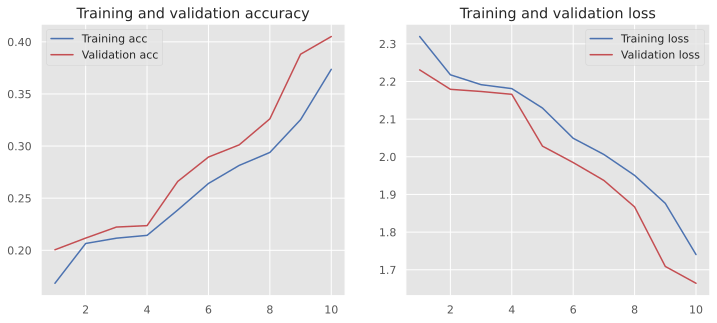

In [122]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

**As we can notice this model is performing better on validation data. So, we find an under-fitting problem as our model is not learning well enough on train data.**

### 6.3. GRU

In [123]:
# GRU with glove embeddings and two dense layers
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(GRU(300, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))
model.add(GRU(300, dropout=0.3, recurrent_dropout=0.3))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(12))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 450, 300)          8100      
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 450, 300)          0         
_________________________________________________________________
gru (GRU)                    (None, 450, 300)          541800    
_________________________________________________________________
gru_1 (GRU)                  (None, 300)               541800    
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              308224    
_________________________________________________________________
dropout_10 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 1024)             

In [124]:
# Fit the model with early stopping callback
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
model.fit(xtrain_pad, y=ytrain_enc, batch_size=64, epochs=10, 
          verbose=1, validation_data=(xvalid_pad, yvalid_enc), callbacks=[earlystop])

Epoch 1/10
381/381 [==============================] - 489s 1s/step - loss: 2.3767 - accuracy: 0.1501 - val_loss: 2.3176 - val_accuracy: 0.1811
Epoch 2/10
381/381 [==============================] - 491s 1s/step - loss: 2.3033 - accuracy: 0.1713 - val_loss: 2.2900 - val_accuracy: 0.1883
Epoch 3/10
381/381 [==============================] - 511s 1s/step - loss: 2.2878 - accuracy: 0.1785 - val_loss: 2.2543 - val_accuracy: 0.1936
Epoch 4/10
381/381 [==============================] - 492s 1s/step - loss: 2.2587 - accuracy: 0.1885 - val_loss: 2.2192 - val_accuracy: 0.1917
Epoch 5/10
381/381 [==============================] - 489s 1s/step - loss: 2.2367 - accuracy: 0.1971 - val_loss: 2.2138 - val_accuracy: 0.1990
Epoch 6/10
381/381 [==============================] - 489s 1s/step - loss: 2.2322 - accuracy: 0.1987 - val_loss: 2.2133 - val_accuracy: 0.1998
Epoch 7/10
381/381 [==============================] - 496s 1s/step - loss: 2.2293 - accuracy: 0.1991 - val_loss: 2.2181 - val_accuracy: 0.1977

**Same under-fitting issue. I must confess though, I didn't run this model with enough epochs. This is one issue having working with colab as it is breaking down too often with these models**

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

### 6.4. CNN

1D convnet

In [128]:
# Training a 1D convnet with existing GloVe features/vectors
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(128,
                 5,
                 activation='relu'))
# we use max pooling:
model.add(MaxPooling1D(5))

model.add(Conv1D(128,
                 5,
                 activation='relu'))
# we use max pooling:
model.add(MaxPooling1D(5))

model.add(Conv1D(128,
                 5,
                 activation='relu'))
# we use max pooling:
model.add(MaxPooling1D(3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(12, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 450, 300)          8100      
_________________________________________________________________
dropout_12 (Dropout)         (None, 450, 300)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 446, 128)          192128    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 89, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 85, 128)           82048     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 17, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 13, 128)          

In [129]:
# Fit the model with early stopping callback
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
model.fit(xtrain_pad, y=ytrain_enc, batch_size=64, epochs=10, 
          verbose=1, validation_data=(xvalid_pad, yvalid_enc))

Epoch 1/10
381/381 [==============================] - 9s 22ms/step - loss: 2.3338 - accuracy: 0.1609 - val_loss: 2.2952 - val_accuracy: 0.1992
Epoch 2/10
381/381 [==============================] - 8s 22ms/step - loss: 1.8892 - accuracy: 0.3333 - val_loss: 1.6762 - val_accuracy: 0.4031
Epoch 3/10
381/381 [==============================] - 8s 22ms/step - loss: 1.4437 - accuracy: 0.4884 - val_loss: 1.2664 - val_accuracy: 0.5537
Epoch 4/10
381/381 [==============================] - 8s 22ms/step - loss: 1.1880 - accuracy: 0.5825 - val_loss: 1.2228 - val_accuracy: 0.5630
Epoch 5/10
381/381 [==============================] - 8s 22ms/step - loss: 1.0243 - accuracy: 0.6382 - val_loss: 1.1736 - val_accuracy: 0.5960
Epoch 6/10
381/381 [==============================] - 8s 22ms/step - loss: 0.8702 - accuracy: 0.6964 - val_loss: 1.1415 - val_accuracy: 0.6135
Epoch 7/10
381/381 [==============================] - 8s 22ms/step - loss: 0.7301 - accuracy: 0.7456 - val_loss: 1.1672 - val_accuracy: 0.6201

**We can find even with 10 epoch that this model is overfitting.**

### 6.5.CNN with Glove features

In [131]:
model = Sequential()

model.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
model.add(Dropout(0.2))
# model.add(BatchNormalization())

# word group filters of size filter_length:
model.add(Conv1D(128,
                 5,
                 activation='relu'))
# we use max pooling:
model.add(MaxPooling1D(5))

model.add(Conv1D(128,
                 5,
                 activation='relu'))
# we use max pooling:
model.add(MaxPooling1D(5))

model.add(Conv1D(128,
                 5,
                 activation='relu'))
# we use max pooling:
model.add(MaxPooling1D(3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(12, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 450, 300)          8100      
_________________________________________________________________
dropout_13 (Dropout)         (None, 450, 300)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 446, 128)          192128    
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 89, 128)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 85, 128)           82048     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 17, 128)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 13, 128)          

In [132]:
# Fit the model with early stopping callback
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
model.fit(xtrain_pad, y=ytrain_enc, batch_size=64, epochs=100, 
          verbose=1, validation_data=(xvalid_pad, yvalid_enc))

Epoch 1/100
381/381 [==============================] - 8s 22ms/step - loss: 2.2997 - accuracy: 0.1791 - val_loss: 2.0063 - val_accuracy: 0.2950
Epoch 2/100
381/381 [==============================] - 8s 21ms/step - loss: 1.7673 - accuracy: 0.3782 - val_loss: 1.4342 - val_accuracy: 0.4974
Epoch 3/100
381/381 [==============================] - 8s 21ms/step - loss: 1.3565 - accuracy: 0.5131 - val_loss: 1.3475 - val_accuracy: 0.5227
Epoch 4/100
381/381 [==============================] - 8s 21ms/step - loss: 1.1861 - accuracy: 0.5746 - val_loss: 1.2118 - val_accuracy: 0.5815
Epoch 5/100
381/381 [==============================] - 8s 21ms/step - loss: 1.0446 - accuracy: 0.6330 - val_loss: 1.1408 - val_accuracy: 0.6126
Epoch 6/100
381/381 [==============================] - 8s 21ms/step - loss: 0.9132 - accuracy: 0.6839 - val_loss: 1.3072 - val_accuracy: 0.5811
Epoch 7/100
381/381 [==============================] - 8s 21ms/step - loss: 0.8016 - accuracy: 0.7225 - val_loss: 1.1470 - val_accuracy:

**I gave this model enough epochs to check what could be result. It was fasters than GRU, LSTMs in computing. But, I found over fitting again.**

### 6.6.BERT

In [135]:
! pip install transformers

     |████████████████████████████████| 890kB 4.9MB/s 
     |████████████████████████████████| 890kB 23.5MB/s 
     |████████████████████████████████| 1.1MB 28.7MB/s 
     |████████████████████████████████| 3.0MB 41.9MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=5a1190b8885e4dde5e6481d36a249e4faa67b35d4fd533cddd02d02e6cd10a6f
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [170]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

# specify GPU
device = torch.device("cuda")

In [171]:
data_xtrain=pd.read_csv('xtrain_obfuscated.txt', header = None,sep=" " )
data_xtrain.columns = ["text"]
data_ytrain=pd.read_csv('ytrain.txt', header = None,sep=" " )
data_ytrain.columns = ["label"]

In [172]:
X=data_xtrain.text
y=data_ytrain.label

In [173]:
# split train dataset into train, validation and test sets
train_text, temp_text, train_labels, temp_labels = train_test_split(X, y, 
                                                                    random_state=42, 
                                                                    test_size=0.25, 
                                                                    stratify=y)


val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=2018, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)

In [174]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [175]:
seq_len = [len(i.split()) for i in train_text]

#### 6.6.1.tokenize and encode sequences

In [176]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

#### 6.6.2.Convert Integer Sequences to Tensors

In [177]:
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

#### 6.6.3. Create DataLoaders

In [178]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

#### 6.6.4. Model Architecture

In [179]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

In [180]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
      
      super(BERT_Arch, self).__init__()

      self.bert = bert 
      
      # dropout layer
      self.dropout = nn.Dropout(0.1)
      
      # relu activation function
      self.relu =  nn.ReLU()

      # dense layer 1
      self.fc1 = nn.Linear(768,512)
      
      # dense layer 2 (Output layer)
      self.fc2 = nn.Linear(512,12)

      #softmax activation function
      self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

      #pass the inputs to the model  
      _, cls_hs = self.bert(sent_id, attention_mask=mask)
      
      x = self.fc1(cls_hs)

      x = self.relu(x)

      x = self.dropout(x)

      # output layer
      x = self.fc2(x)
      
      # apply softmax activation
      x = self.softmax(x)

      return x

In [181]:
# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)

# push the model to GPU
model = model.to(device)

In [182]:
# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(),lr = 1e-5)          # learning rate

In [183]:
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_weights = compute_class_weight('balanced', np.unique(train_labels), train_labels)

print("Class Weights:",class_weights)

Class Weights: [4.99262899 0.78334618 1.84224841 0.67351674 1.15915573 1.18691589
 0.64121174 0.53151975 0.74541453 2.76462585 0.8877239  1.92424242]


In [190]:
# converting list of class weights to a tensor
weights= torch.tensor(class_weights,dtype=torch.float)

# push to GPU
weights = weights.to(device)

# define the loss function
cross_entropy  = nn.NLLLoss(weight=weights) 

# number of training epochs
epochs = 5

#### 6.6.5. Fine-Tune BERT

In [191]:
# function to train the model
def train():
  
  model.train()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save model predictions
  total_preds=[]
  
  # iterate over batches
  for step,batch in enumerate(train_dataloader):
    
    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r.to(device) for r in batch]
 
    sent_id, mask, labels = batch

    # clear previously calculated gradients 
    model.zero_grad()        

    # get model predictions for the current batch
    preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)
  
  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [192]:
# function for evaluating the model
def evaluate():
  
  print("\nEvaluating...")
  
  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):
    
    # Progress update every 50 batches.
    #if step % 50 == 0 and not step == 0:
      
      # Calculate elapsed time in minutes.
      #elapsed = format_time(time.time() - t0)
            
      # Report progress.
      #print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t.to(device) for t in batch]

    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():
      
      # model predictions
      preds = model(sent_id, mask)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader) 

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

In [193]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 5
  Batch    50  of    762.
  Batch   100  of    762.
  Batch   150  of    762.
  Batch   200  of    762.
  Batch   250  of    762.
  Batch   300  of    762.
  Batch   350  of    762.
  Batch   400  of    762.
  Batch   450  of    762.
  Batch   500  of    762.
  Batch   550  of    762.
  Batch   600  of    762.
  Batch   650  of    762.
  Batch   700  of    762.
  Batch   750  of    762.

Evaluating...

Training Loss: 2.486
Validation Loss: 2.486

 Epoch 2 / 5
  Batch    50  of    762.
  Batch   100  of    762.
  Batch   150  of    762.
  Batch   200  of    762.
  Batch   250  of    762.
  Batch   300  of    762.
  Batch   350  of    762.
  Batch   400  of    762.
  Batch   450  of    762.
  Batch   500  of    762.
  Batch   550  of    762.
  Batch   600  of    762.
  Batch   650  of    762.
  Batch   700  of    762.
  Batch   750  of    762.

Evaluating...

Training Loss: 2.485
Validation Loss: 2.486

 Epoch 3 / 5
  Batch    50  of    762.
  Batch   100  of    762.
  Batc

**On colab, I had few issues. I went out of RAM once and had to restart all notebook again. It was hell of an experience with all keras model running already. So, I didn't run them again. I ran pytorch code. That is why one can find code that reads pandas, train_test and preprocessing steps once again. The reason was my colab shut down.**

- After running individually, I could not run too may iterations as I liked. So, I ran only 5. It does not show over or under fitting with loss function. This is a good sign. But, I have not trained this model on enough iteration to consider it suitable model. 

- For this reason, I called it 2nd most suitable model. I wish to have more computing resources so that I may experiement more. Idea is to show that I understand deep learning concepts and algorithms. 

In [194]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

#### 6.6.6. Get Predictions

In [195]:
# get predictions for test data
with torch.no_grad():
  preds = model(test_seq.to(device), test_mask.to(device))
  preds = preds.detach().cpu().numpy()

In [196]:
from sklearn.metrics import accuracy_score
preds = np.argmax(preds, axis = 1)
print(accuracy_score(test_y, preds))

0.13013530135301354


As We trained only for 5 epochs, accuracy value is low. However; there is no overfitting as train_loss and valid_loss remain close. But, accuracy is not acceptable.

We shall use LSTM model as our most optimized model as there was less over or under-fitting, accuracy and loss scores were good and with more epochs , this model could do even better(code from 91-116 lines).

# END of NOTEBOOK